In [ ]:
from Unet.Predecir.raster_to_tiles_test import tile_geotiff
# 1. Split tif into tiles
tif= r"B-A.tif"

carpeta_Salida = r"DatasetTestTIF/"

tile_geotiff(tif, out_dir=carpeta_Salida, tile_size=512, overlap=0)

Skipping tile_0 at (0,0). Mean intensity 0.00 < 5.0
Skipping tile_0 at (512,0). Mean intensity 0.00 < 5.0
Skipping tile_0 at (1024,0). Mean intensity 0.99 < 5.0
Skipping tile_5 at (4096,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (4608,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (5120,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (5632,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (6144,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (6656,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (7168,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (7680,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (8192,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (8704,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (9216,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (9728,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (10240,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (10752,0). Mean intensity 0.00 < 5.0
Skipping tile_5 at (11264,0). Mean intensity 0.00 < 5.0
Skipping ti

In [ ]:
from tensorflow import keras

ruta_modelo = r"modelo.keras"

model = keras.models.load_model(ruta_modelo, compile=False)
print("Modelo cargado.")

Modelo cargado.


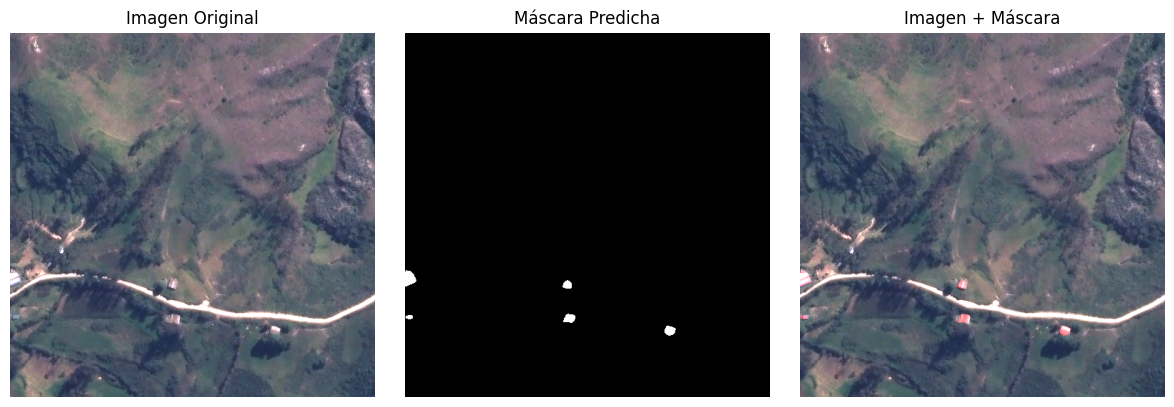

In [ ]:
import rasterio
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_path = r"ruta_tif"
mask_path = r"mask_tif"

# Leer imagen
with rasterio.open(image_path) as src:
    img = src.read()          # shape → (bands, H, W)
    img = np.moveaxis(img, 0, -1)  # → (H, W, bands)

# Leer máscara guardada
with rasterio.open(mask_path) as src:
    mask = src.read(1)  # Leer primera banda

img_rgb = img[..., :3] 
img_rgb = img_rgb.astype("float32") / 255.0

# Convertir máscara a rango 0-1
mask_bin = (mask / 255.0).astype("float32")

overlay = img_rgb.copy().astype("float32")

# Crear máscara roja (mantener en rango 0-1)
mask_color = np.zeros_like(overlay)
mask_color[:,:,0] = mask_bin  # rojo donde hay objeto (0-1 range)

alpha = 0.5  # transparencia

blended = cv2.addWeighted(overlay, 1, mask_color, alpha, 0)

# Clip to valid range
blended = np.clip(blended, 0, 1)

# Crear figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Imagen original
axes[0].imshow(img_rgb)
axes[0].set_title("Imagen Original")
axes[0].axis("off")

# Máscara binaria
axes[1].imshow(mask_bin, cmap='gray')
axes[1].set_title("Máscara Predicha")
axes[1].axis("off")

# Overlay
axes[2].imshow(blended)
axes[2].set_title("Imagen + Máscara")
axes[2].axis("off")

plt.tight_layout()
plt.show()

In [ ]:

from prediccion import predict_tiles
# Uso
input_dir = r"DatasetTestTIF"
output_dir = r"MascarasPredichas"

predict_tiles(input_dir, output_dir, model, threshold=0.5)

Encontrados 639 tiles para predecir


Prediciendo tiles: 100%|██████████| 639/639 [00:57<00:00, 11.11it/s]


Predicción completada. Máscaras guardadas en: D:\Diciembre\Entrenamiento\Unet\Predecir\MascarasPredichas


In [ ]:
from reconstruccion import stitch_tiles

# 3. Stitch into full tif
carpeta_tiles = r"DatasetTestTIF"
carpeta_predTiles = r"MascarasPredichas"
imagen_saved_path = r"imagen_no_overlap.tif"

stitch_tiles(carpeta_tiles, carpeta_predTiles, imagen_saved_path)

GeoTIFF rearmado guardado en: D:\Diciembre\Entrenamiento\Unet\Predecir\imagen_no_overlap.tif
